In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# W tej analizie zajmiemy się danymi dotyczącymi gatunków zagrożonych zwierząt w parkach narodowych Stanów Zjednoczonych.
Cele naszej analizy:
1. Badanie zawartości dostępnego zbioróu danyc: species_info.csv.
2. Analiza danych dotycząca ilości zagrożonych zwierząt w podziale na status ich ochrony.
3. Badanie zawartości zbioru observations.csv.
4. Analiza ilości obserwacji w podziale na parki narodowe.
5. Analiza danych z połączonych zbiorów, dotycząca iości zagorożonych zwierząt dla określonych gatunków zwierząt w podziale na rodzaje zagorżeń ogółem i dla poszczególnych parków narodowych.
6. Wnioski płynaące z analizy.

# 1. Badani zawartości zbioru species_info.csv

In [3]:
species = pd.read_csv('species_info.csv', encoding = 'utf_8')
print(species.info())
species.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


**species_info** - zbiór danych zaawierający nastepujące informacje:
- category - gatunek zwierzęcia
- scientific_name - naukowa nazwa zwierzęcia
- common_names -  powszechnie używana nazwa zwierzęcia
- conservation_status - status ochrony

W przypadku pola conservation_status tylko 191 na 5824 obserwacji posiada nie puste dane.
Zbadajmy, jakie są unikalne wartości pól.

In [4]:

print(f" category: {species.category.unique()}")
print('scientific_name')
print(species.scientific_name.unique())
print('common_names')
print(species.common_names.unique())
print('conservation_status')
print(species.conservation_status.unique())

 category: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
scientific_name
['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']
common_names
["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']
conservation_status
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Sprawdzamu, czy zbiór zawiera zduplikowane wiersze według pola 'scientific_name i 'conservation_status', usuwamy zduplikowane dane

In [5]:
species_dup=species.duplicated(subset=['scientific_name','conservation_status'])
print(species[species_dup].info())
species = species.drop_duplicates(subset=['scientific_name','conservation_status'])
species_dup=species.duplicated(subset=['scientific_name'])
display(species[species_dup])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 3017 to 5750
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             281 non-null    object
 1   scientific_name      281 non-null    object
 2   common_names         281 non-null    object
 3   conservation_status  11 non-null     object
dtypes: object(4)
memory usage: 11.0+ KB
None


,category,scientific_name,common_names,conservation_status
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


Zbiór zawiera jeszcze dwa zapisy ze zduplikowanymi nazwami naukowymi zwierząt,
ale z różnym statusem ochrony.
Sprawdżmy czego dotyczą te zapisy.


In [6]:
display(species[species.scientific_name == 'Canis lupus'])
display(species[species.scientific_name == 'Oncorhynchus mykiss'])

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery


,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


Usuwamy błędne zpisy i sprawdzamy ponownie.

In [7]:
species=species.drop(index=3020)
species = species.drop(index=3283)
display(species[species.scientific_name == 'Canis lupus'])
display(species[species.scientific_name == 'Oncorhynchus mykiss'])

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered


,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,NaN


**Kolumna 'conservation_status' przybiera następujące wartości:**
1. **Cpecies of concern** - gatunek budzący obawy dot. zagrożenia
2. **Endangered** - narażony
3. **Threatened** - zagrożony
4. **In Recovery** - w okresie przywracania populacji
5. **nan** - brak danych

Dane puste zostaną zastąpione informacją - 'nie chroniony' ('Not protected').


In [8]:
species = species.fillna('Not protected')
print(species.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB
None


Zbiór zawiera 7 gatunków zwierząt. Dla każdego z nich występują następujące ilości zwierząt:

In [9]:
print(species.groupby('category').size())

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
dtype: int64


# 2.Analiza zawartości zbioru species_info.csv:
Wykres zawiera podził na gatunki zwierząt (7 rodzajów) i status ochrony(5 rodzajów).
   - oś x - status ochrony w podziale na gatunki zwierząt
   - oś y - ilość zwierząt dla danego statusu ochrony
   
    Ze statusem 'Not protected' jest pond 5000 obserwacji.
    Aby dokonać analizy pozostałych danych, pominiemy ten rodzaj statusu ochrony
    

conservation_status
Endangered             15
In Recovery             3
Species of Concern    151
Threatened              9
dtype: int64
conservation_status  category         
Endangered           Amphibian             1
                     Bird                  4
                     Fish                  3
                     Mammal                6
                     Vascular Plant        1
In Recovery          Bird                  3
Species of Concern   Amphibian             4
                     Bird                 68
                     Fish                  4
                     Mammal               22
                     Nonvascular Plant     5
                     Reptile               5
                     Vascular Plant       43
Threatened           Amphibian             2
                     Fish                  3
                     Mammal                2
                     Vascular Plant        2
dtype: int64


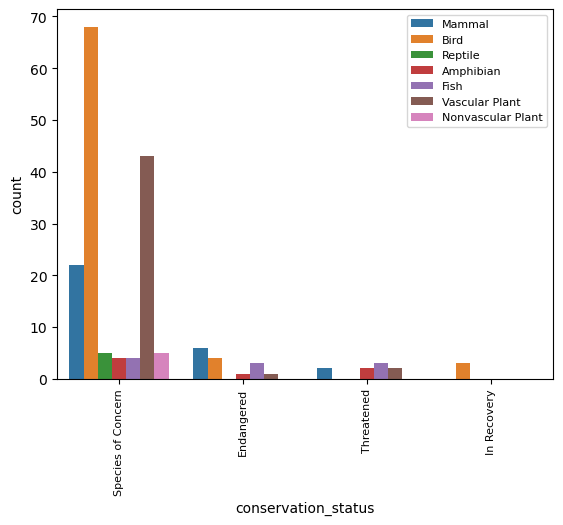

<Figure size 640x480 with 0 Axes>

In [10]:
conservation_group = species[species.conservation_status!= 'Not protected']
print(conservation_group.groupby('conservation_status').size())

print(conservation_group.groupby(['conservation_status','category']).size())
lab_x = ['Species of Concern' ,'Endangered', 'Threatened', 'In Recovery']
ax = plt.subplot()
sns.countplot(x='conservation_status', data= conservation_group, hue = 'category')
ax.set_xticklabels(labels=lab_x, rotation=90,fontsize = 8)
plt.legend(loc = 1, fontsize = 8)

plt.show()
plt.clf()


**W trakcie odtwarzania gatunku są:**

    3 ptaki    
sprawdżmy jakie to są zwierzęta:
    

In [11]:
display(conservation_group[['category','common_names','conservation_status']][conservation_group.conservation_status=='In Recovery'])

,category,common_names,conservation_status
100,Bird,Bald Eagle,In Recovery
3143,Bird,American Peregrine Falcon,In Recovery
4565,Bird,Brown Pelican,In Recovery


**Zagrożone są:**
- 3 ryby
- 2 płazy
- 1 ssak
- 2 rodzaje roślin naczyniowych


    

In [12]:
display(conservation_group[['category','common_names','conservation_status']][conservation_group.conservation_status=='Threatened'])

,category,common_names,conservation_status
38,Mammal,"Northern Long-Eared Bat, Northern Myotis",Threatened
490,Fish,Spotfin Chub,Threatened
571,Fish,Yellowfin Madtom,Threatened
704,Vascular Plant,Small Whorled Pogonia,Threatened
2562,Vascular Plant,Virginia Spiraea,Threatened
3032,Mammal,Grizzly Bear,Threatened
4597,Amphibian,Yosemite Toad,Threatened
4600,Amphibian,California Red-Legged Frog,Threatened
4612,Fish,Lahontan Cutthroat Trout,Threatened


**Narażone są:**
- 1 płaz
- 4 ptaki
- 3 ryby
- 6 ssaków
- 1 roślina naczyniowa

In [13]:
display(conservation_group[['category','common_names','conservation_status']][conservation_group.conservation_status=='Endangered'])

,category,common_names,conservation_status
8,Mammal,Gray Wolf,Endangered
9,Mammal,Red Wolf,Endangered
34,Mammal,Gray Myotis,Endangered
39,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
173,Bird,Whooping Crane,Endangered
276,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
343,Bird,Red-Cockaded Woodpecker,Endangered
540,Fish,Duskytail Darter,Endangered
570,Fish,Smoky Madtom,Endangered


**Gatunki budzące obawy:**

In [14]:
display(conservation_group[['category','common_names','conservation_status']][conservation_group.conservation_status=='Species of Concern'])

,category,common_names,conservation_status
7,Mammal,Coyote,Species of Concern
29,Mammal,Big Brown Bat,Species of Concern
30,Mammal,Silver-Haired Bat,Species of Concern
33,Mammal,"Mississippi Myotis, Southeastern Myotis",Species of Concern
35,Mammal,Keen's Myotis,Species of Concern
...,...,...,...
5302,Vascular Plant,Winged Water-Starwort,Species of Concern
5399,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
5426,Vascular Plant,"Grants Pass Willowherb, Oregon Fireweed",Species of Concern
5436,Vascular Plant,"Trianglelobe Moonwort, Upswept Moonwort",Species of Concern


In [15]:
print(conservation_group.
        groupby('category').size())

category
Amphibian             7
Bird                 75
Fish                 10
Mammal               30
Nonvascular Plant     5
Reptile               5
Vascular Plant       46
dtype: int64


### 3. Badanie zawartości zbioru observations.csv

In [16]:
observations = pd.read_csv('observations.csv')
print(observations.info())
print(observations.head())
print(observations.park_name.unique())
print(f"ilość zwierząt we wszystkich parkach narodowych: {observations.observations.sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
ilość zwierząt we ws

Zbiór zawiera 23 296 obserwacji z kolumnami:
1. **scientific_name** - nazwa naukowa zwierzęcia
2. **park_name** - nazwa parku narodowego
3. **observations** - ilość obserwacji danego zwierzęcia

Brak jest pustych danych w zbiorze.

Zbadajmy, jak rozkładają się dane w polu 'observations'

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
scientific_name    Vicia benghalensisNeovison visonPrunus subcord...
park_name          Great Smoky Mountains National ParkGreat Smoky...
observations                                                 3314739
dtype: object


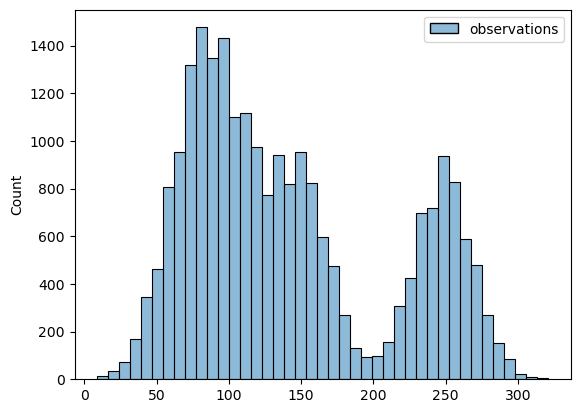

<Figure size 640x480 with 0 Axes>

In [17]:
print(observations.describe())
print(observations.sum())
sns.histplot(data=observations)
plt.show()
plt.clf()

zobaczmy ile jest zwierząt w każdym z parków narodowych

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64


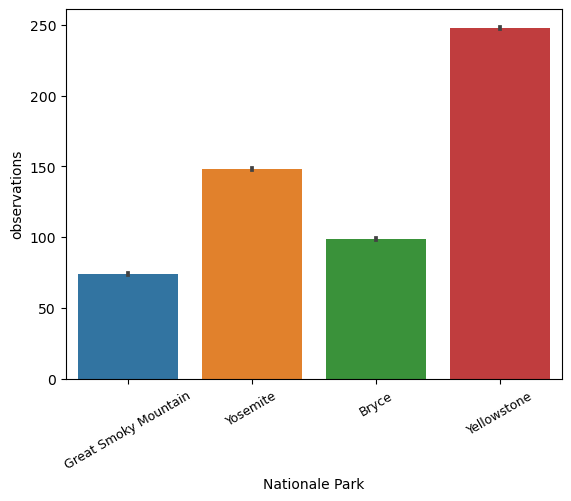

<Figure size 640x480 with 0 Axes>

In [18]:
obs_group = observations.groupby('park_name').observations
print(obs_group.sum())
ax = sns.barplot(x='park_name', data= observations, y = 'observations')
ax_label = ['Great Smoky Mountain', 'Yosemite',
 'Bryce','Yellowstone']
ax.set_xticklabels(labels=ax_label, rotation=30, fontsize = 9)
ax.set_xlabel('Nationale Park')
plt.show()
plt.clf()

### 3.  Analiza połączonych zbiorów (species.scv i observations.csv)

In [19]:

observations_species = pd.merge(observations,species,on=['scientific_name'],how='left')
observations_park = observations_species[observations_species['conservation_status'] != 'Not protected']
print(observations_species.count())
print(observations_species.park_name.unique())
print(f':ilość zwierząt pod ochroną: {observations_park.observations.sum()}')

scientific_name        23296
park_name              23296
observations           23296
category               23296
common_names           23296
conservation_status    23296
dtype: int64
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
:ilość zwierząt pod ochroną: 89295


3.1. Sprawdźmy jak rozkładać się będzie ilość zwierząt w podziale na rodzaje ochrony i parki narodowe.

                                                         observations
conservation_status park_name                                        
Endangered          Bryce National Park                           489
                    Great Smoky Mountains National Park           334
                    Yellowstone National Park                    1228
                    Yosemite National Park                        747
In Recovery         Bryce National Park                           258
                    Great Smoky Mountains National Park           189
                    Yellowstone National Park                     559
                    Yosemite National Park                        386
Not protected       Bryce National Park                        559926
                    Great Smoky Mountains National Park        420643
                    Yellowstone National Park                 1404899
                    Yosemite National Park                     839976
Species of Concern  

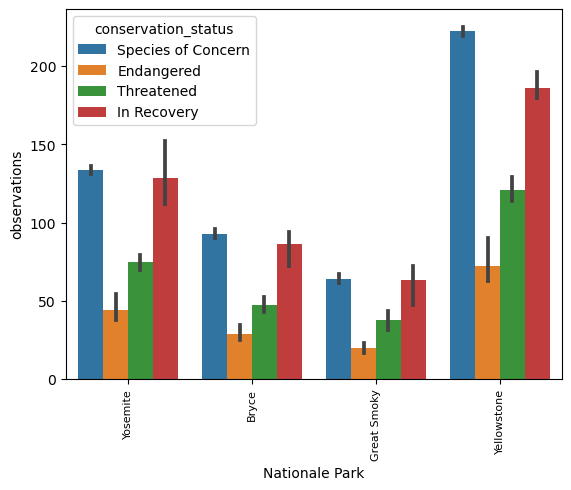

<Figure size 640x480 with 0 Axes>

In [20]:
observations_group = observations_species.groupby(['conservation_status','park_name'])
print(observations_group.sum())
lab_x = ['Yosemite','Bryce','Great Smoky','Yellowstone']
ax = plt.subplot()
sns.barplot(x='park_name', data= observations_park, y = 'observations',hue = 'conservation_status')
ax.set_xticklabels(labels=lab_x, rotation=90,fontsize = 8)
ax.set_xlabel('Nationale Park')
plt.show()
plt.clf()

Park narodowy Yellowstone ma największą ilość zwierząt chronionych i pod obserwacją, jednak jest to największy park z analizowanych i posiada największą ilość obserwacji.

3.2. W parkach narodowych jest różna ilość obserwacji ogółem, dlatego zanalizujmy udział gatunków chronionych w ilości wszystkich obserwacji w danym parku narodowym.
Liczba obserwacji podana jest bez wcześniej wyeliminowanych zwierząt nie chronionych.

W  połączonym zbiorze observations_percent wystąpią pola:
- observations_x - ilość obserwacji dla parku narodowego i statusu ochrony
- observations_y - ilość obserwacji ogółem dla parku narodowego
- percent - udział obserwacji dla statusu ochrony w obserwacjach ogółem danego parku narodowego

                             park_name  observations
0                  Bryce National Park         16099
1  Great Smoky Mountains National Park         11177
2            Yellowstone National Park         38663
3               Yosemite National Park         23356
   conservation_status                            park_name  observations_x  \
0           Endangered                  Bryce National Park             489   
1           Endangered  Great Smoky Mountains National Park             334   
2           Endangered            Yellowstone National Park            1228   
3           Endangered               Yosemite National Park             747   
4          In Recovery                  Bryce National Park             258   
5          In Recovery  Great Smoky Mountains National Park             189   
6          In Recovery            Yellowstone National Park             559   
7          In Recovery               Yosemite National Park             386   
8   Species of Concern  

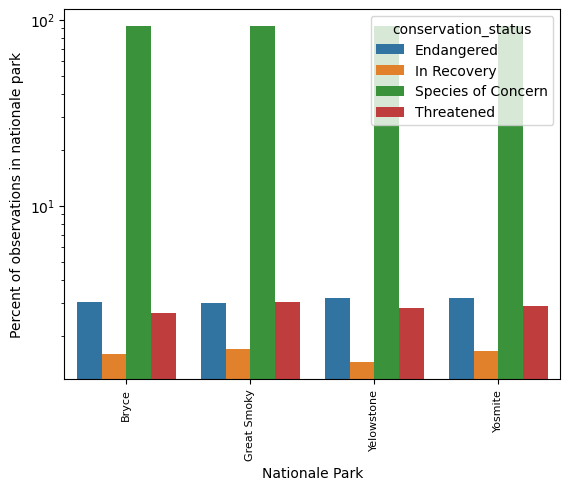

<Figure size 640x480 with 0 Axes>

In [21]:
observations_group = observations_park.groupby(['conservation_status','park_name']).sum().reset_index()
observations_sum = observations_park.groupby(['park_name']).sum().reset_index()
print(observations_sum)
observations_percent  = pd.merge(observations_group,observations_sum,on=['park_name'],how='left')
observations_percent['percent'] =  observations_percent.observations_x/observations_percent.observations_y*100

print(observations_percent)
ax = sns.barplot(x='park_name', data= observations_percent, y = 'percent',hue = 'conservation_status')
lab_x = ['Bryce','Great Smoky','Yelowstone','Yosmite']
ax.set_xticklabels(labels=lab_x, rotation=90,fontsize = 8)
ax.set_xlabel('Nationale Park')
ax.set_ylabel('Percent of observations in nationale park')
ax.set_yscale("log")
plt.show()
plt.clf()

Widzimy, że ilość zwierząt chronionych w stosunku do ilości zwierząt ogółem rozkłada się bardziej równomiernie we wszystkich parkach narodowych.
Park Great Smoky ma proporcjonalnie najwięcej zwierząt zagrozonych i w trakcie przywracania gatunków.


3.3. Zobaczmy, jak wygląda podział zwierząt na gatunki i ich status ochrony we wszystkich parkach narodowych razem.

             category conservation_status  observations
0           Amphibian          Endangered           144
1                Bird          Endangered           574
2                Fish          Endangered           455
3              Mammal          Endangered          1463
4      Vascular Plant          Endangered           162
5                Bird         In Recovery          1392
6           Amphibian  Species of Concern          2044
7                Bird  Species of Concern         36642
8                Fish  Species of Concern          2109
9              Mammal  Species of Concern         14408
10  Nonvascular Plant  Species of Concern          2705
11            Reptile  Species of Concern          2536
12     Vascular Plant  Species of Concern         22135
13          Amphibian          Threatened           564
14               Fish          Threatened           832
15             Mammal          Threatened           578
16     Vascular Plant          Threatened       

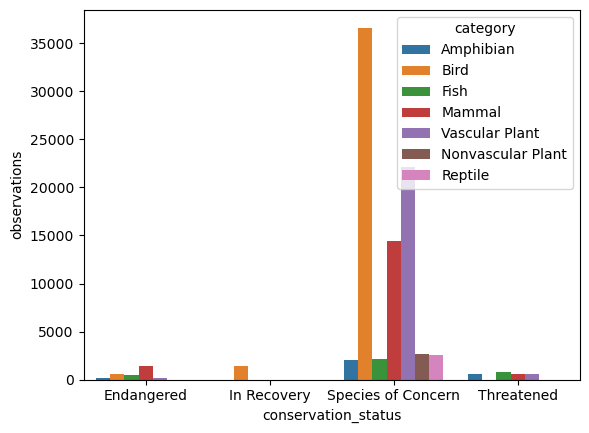

<Figure size 640x480 with 0 Axes>

In [22]:

observations_group = observations_park.groupby(['conservation_status','category']).sum().reset_index()
print(observations_group[['category','conservation_status','observations']])

ax = sns.barplot(x='conservation_status', data= observations_group, y = 'observations',hue = 'category')
#ax.set_yscale("log")
plt.show()
plt.clf()

# Wnioski
1. Na 3 314 739 zwierząt żyjących w badanych parkach narodowych przypada 89 295 zwierząt podlegających ochronie lub będących pod obserwacja. Jest to tylko 2,7% wszystkich zaobserwowanych zwierząt.

2. Należą do nich zwierzeta wszystkich gatunków, a ich podział na statusy ochrony pokazano w punkcie 3.3
    
3. Ilość zwierząt chronionych dla każdego gatunku pokazuję niżej.    




In [23]:
print(conservation_group.
        groupby('category').size())

category
Amphibian             7
Bird                 75
Fish                 10
Mammal               30
Nonvascular Plant     5
Reptile               5
Vascular Plant       46
dtype: int64


4. Ilość obserwacji zwierząt chronionych dla każdego gatunku wynosi:

In [24]:
print(observations_park.groupby('category').sum())

                   observations
category                       
Amphibian                  2752
Bird                      38608
Fish                       3396
Mammal                    16449
Nonvascular Plant          2705
Reptile                    2536
Vascular Plant            22849
